In [2]:
from scipy.stats import norm

import numpy as np
import scipy as sp
from pandas.core import datetools as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
from sklearn.datasets import make_regression



In [4]:
X0 ,y, coef = make_regression(n_samples = 100, n_features = 2, bias = 100, noise = 10, coef = True, random_state = 1)

In [13]:
coef,X0

(array([ 32.26809968,  86.44794301]), array([[ 0.0465673 ,  0.80186103],
        [-2.02220122,  0.31563495],
        [-0.38405435, -0.3224172 ],
        [-1.31228341,  0.35054598],
        [-0.88762896, -0.19183555],
        [-1.61577235, -0.03869551],
        [-2.43483776, -0.31011677],
        [ 2.10025514,  0.19091548],
        [-0.50446586, -1.44411381],
        [ 1.14472371, -1.10061918],
        [ 0.58281521,  0.04221375],
        [ 0.07734007,  0.42349435],
        [ 1.1110567 ,  1.90465871],
        [ 0.61838026,  0.07782113],
        [-0.24863478,  2.52832571],
        [-1.89636092,  2.19069973],
        [-0.77516162, -0.02461696],
        [ 0.5505375 , -1.23005814],
        [-0.85951594,  0.84616065],
        [-0.61736206, -0.11044703],
        [ 0.2135339 ,  0.98633519],
        [-2.3015387 ,  0.86540763],
        [-0.3198016 ,  0.68006984],
        [ 0.40890054,  1.12141771],
        [ 0.13770121,  0.52946532],
        [-0.63873041, -0.37528495],
        [-0.17470316,  0.49

In [12]:
print(X0.shape)
print(y.shape)

(100, 2)
(100,)


In [25]:
## Augmentation np.hstack으로 만들기 
##가중치 행렬을 만들기위해 앞열에 무조건 1을 넣음.. 그래야 선형회귀모형에서 상수항이 나올수 있음
#X = np.hstack()
np.ones((3,3))
np.hstack([np.ones((X0.shape[0],1)),X0])

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555],
       [ 1.        , -1.61577235, -0.03869551],
       [ 1.        , -2.43483776, -0.31011677],
       [ 1.        ,  2.10025514,  0.19091548],
       [ 1.        , -0.50446586, -1.44411381],
       [ 1.        ,  1.14472371, -1.10061918],
       [ 1.        ,  0.58281521,  0.04221375],
       [ 1.        ,  0.07734007,  0.42349435],
       [ 1.        ,  1.1110567 ,  1.90465871],
       [ 1.        ,  0.61838026,  0.07782113],
       [ 1.        , -0.24863478,  2.52832571],
       [ 1.        , -1.89636092,  2.19069973],
       [ 1.        , -0.77516162, -0.02461696],
       [ 1.        ,  0.5505375 , -1.23005814],
       [ 1.        , -0.85951594,  0.84616065],
       [ 1.        , -0.61736206, -0.11044703],
       [ 1.        ,  0.2135339 ,  0.986

In [37]:
## Augmentation 을 StatsModels에서 제공하는걸로 만들기
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [48]:
## Ordinary Least Squares (Numpy 이용) 선형회귀분석, 최소 자승문제 

from sklearn.datasets import make_regression

X0,y,coef = make_regression(n_samples = 100, n_features = 1, bias = 100, noise = 10,coef = True, random_state = 1)


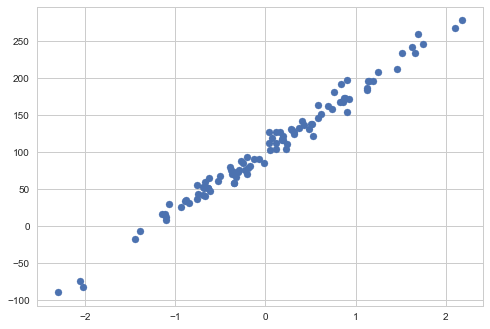

In [49]:
plt.scatter(X0,y)

In [53]:
X = sm.add_constant(X0) ## Augement 만듬 
X[:5]
coef

array(80.71051956187792)

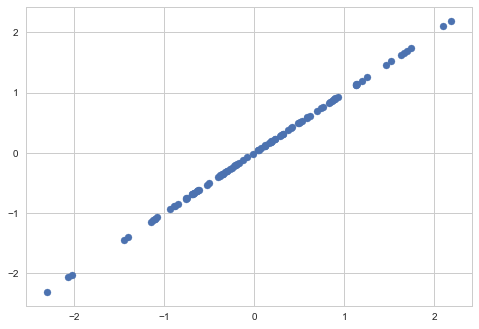

In [83]:
## OLS(Ordinary Least Squares) 최소자승문제 numpy 로 만들기

from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples = 100, n_features = 1, bias = 100, noise = 10, coef = True, random_state = 1)

X = sm.add_constant(X0)
y = y.reshape(len(y),1)
plt.scatter(X0[:],X0[:])


$$  w = (X^TX)^{-1} X^T y $$

In [78]:
## OLS(ordinary Least Square) 해를 직접 이용하는 방법

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
w ## 가중치 벡터 w는 하기와 같은 값을 가짐 
## [[ 102.02701439],[  81.59750943]]) = bias 약 102, coef = 81 

array([[ 102.02701439],
       [  81.59750943]])

In [107]:
## 최소자승 Least Square 명령이용

w= np.linalg.lstsq(X,y)
W= w[0]

In [109]:
xx = np.linspace(np.min(X0),np.max(X0),100)
xx_new = sm.add_constant(xx) ## 1행*100열 벡터
xx_new ## 100행 2열벡터 (앞에 1을 모두 추가해줌)

yy = np.dot(xx_new, W)
yy

array([[ -85.77281113],
       [ -82.0744542 ],
       [ -78.37609728],
       [ -74.67774036],
       [ -70.97938344],
       [ -67.28102651],
       [ -63.58266959],
       [ -59.88431267],
       [ -56.18595575],
       [ -52.48759882],
       [ -48.7892419 ],
       [ -45.09088498],
       [ -41.39252805],
       [ -37.69417113],
       [ -33.99581421],
       [ -30.29745729],
       [ -26.59910036],
       [ -22.90074344],
       [ -19.20238652],
       [ -15.50402959],
       [ -11.80567267],
       [  -8.10731575],
       [  -4.40895883],
       [  -0.7106019 ],
       [   2.98775502],
       [   6.68611194],
       [  10.38446886],
       [  14.08282579],
       [  17.78118271],
       [  21.47953963],
       [  25.17789656],
       [  28.87625348],
       [  32.5746104 ],
       [  36.27296732],
       [  39.97132425],
       [  43.66968117],
       [  47.36803809],
       [  51.06639502],
       [  54.76475194],
       [  58.46310886],
       [  62.16146578],
       [  65.859

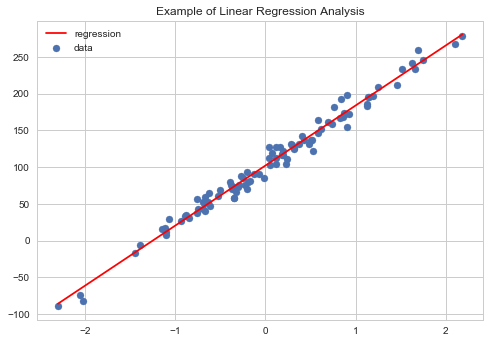

In [119]:
plt.scatter(X0,y, label ='data')
plt.plot(xx,yy,'r', label = 'regression')
## plt.plot(xx_new,yy,'r', label = 'regression')
plt.legend()
plt.title('Example of Linear Regression Analysis')

In [145]:
## Scikit-Learn 패키지 선형회귀 모형 ## 제일 많이 쓰이고 정확도 높음
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model = LinearRegression()# 만약 fit_intercept = True 로 디폴트, 상수항있음
model_boston = LinearRegression().fit(boston.data, boston.target) ## 알아서 Augmentation 

In [146]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [147]:
model_boston.coef_ ## shape = 13,

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [148]:
model_boston.intercept_ ## y 절편값 36.491103280363134 , LinearRegression 디폴트 true 값이라 상수항 자동설정됨 

36.491103280363134

In [137]:
## y_new = model.predict(x_new) pridict를 사용하여 입력데이터에 대한 출력데이터 예측
predictions = model_boston.predict(boston.data)
predictions.shape

(506,)

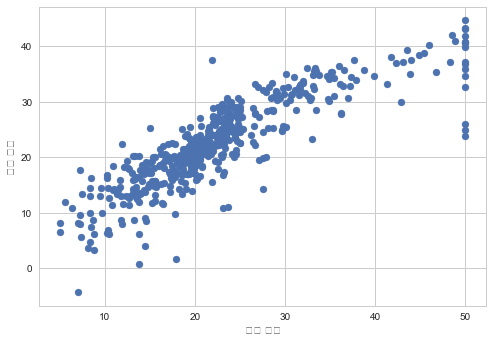

In [140]:
plt.scatter(boston.target, predictions)
plt.xlabel('실제 집값')
plt.ylabel('집값 예측')

In [155]:
import pandas as pd 
## StatsModels 를 사용한 선형회귀분석 ## Augmentation 넣기 
dfy = pd.DataFrame(boston.target, columns = ['Price'])
dfX0 = pd.DataFrame(boston.data, columns = boston.feature_names)
dfX = sm.add_constant(dfX0)
dfX.tail() ## 505 * 
##dfX.shape ## 506*14

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,1.0,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [161]:
model_boston2 = sm.OLS(dfy,dfX).fit() ## 자동으로 fit 시킴 - 자동으로 모형을 찾아줌
print(model_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        23:28:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

## Interpreting OLS results

OLS 에는 하기와 같이 분석항목이 들어가있다

1. Model Performance (모델 측정) - Multiple R-Squared & Adjusted R-Squared 
2. each explanotory variable (각각의 설명변수) - Variable, Coef ,Std Error, T-Statistic, Prob(T-Statistic)
3. model significance 모델 중요성 - F-Statistic, Prob(F-Statistic)
4. stationarity (안정성) Koenker Statistic
5. model bias 모델 편향 정도 - Jarque-Bera Statistic
6. spatial autocorrelation 평가 - OLS 결과에대한 신뢰도를 나타냄, 중요 데이터가 빠졌는지확인, 모델을 믿을수 있는지 확인 (만약 높거나 낮은 잔차가 너무 많으면 중요데이터가 빠졌음: misspecification)  

#### Result Summary 
   - Dep.Variable : 종속변수, 보스턴집값에서는 집값 실제 가격들을 의미한다 
   - No.Observations : 데이터 개수
   - Df Residuals: 잔차 자유도, The residual degree of freedom, defined as the number of observations minus the rank of the regressor matrix.
   - Df Model: 모형 자유도, The Model degeree of freedom, definded as the rank of the regressor of matrix minus 1 if a constant is included.(선형회귀 행렬, 상수항 회귀계수가 포함되어있을경우  W hat 행렬 -1 에서 독립 열랭크개수)  
   - Multiple R-Squared & Adjusted R-Squared values : 모델 퍼포먼스의 측정치이다 둘다 0과 1사이의 범위값을 갖는다. 여기서 0.741 이라면 이 모델이 74퍼센트정도로 종속변수 변화를 설명한다고 볼 수 있다. Adjusted는 R-Squared 보다 작은 값을 가지며 모델의 복잡도(변수의 수)를 반영하기 때문에 더 정확한 값을 나타낸다. 
   - Coefficient : 가중치 벡터 w의 계수들, 각각의 feature 변수의 가중치를 나타낸다. 즉 영향도를 나타낸다. (기울기로도 나타낼수 있다.)
   - Const: y 절편 (상수항) 
   - std err : Estimated 가중치 벡터 w hat의 모형계수 표준편차
   
  
  
#### OLS Diagnostics 

   - T-검정: 단일계수 t검정의 검정통계량, 귀무가설 H0:wi=0 : 특정회귀계수 wi 가 0이다라고 가정, 즉 단일 회귀계수가 독립변수와 종속변수에 영향을 미치는지를 확인, 만약 0이라면(귀무가설채택) 해당독립변수는 종속변수와 아무런상관이 없음  
       - P >|T|: 귀무가설 H0:wi=0 에 대한 유의 확률, p-value가 낮으면 귀무가설  H0:wi=0이다 라는 가설이 먹히지 않음 
   - 회귀분석 F-검정(Loss-of-fit 검정):전체회귀계수에 대한 검정통계랑: 귀무가설 H0:w1=w2=⋯=wK=0 , 즉 전체회귀계수가 0이다(독립변수와 종속변수간에 상관관계가 없다); 전체 독립변수 중 어느것도 의미를 가진것이 없다는 뜻. 
       - Prob(F-statistc): 귀무가설 H0:w1=w2=⋯=wK=0 에 대한 유의 확률, p-value 이 많이 작으면 귀무가설 기각이므로 전체 독립변수들이 더 강력하게 모형에 영향을 미친다는것을 알 수 있다. 
   - Omnibus: 정규성검정
   - Jarque-Bera Statistic : 잔차 Residuals (y-y^) 가 정규 분포를 따르는지 확인
   - Prob(Omnibus): 정규성검정에 대한 유의확률
   - Skew: 3차 모멘토: 찌그러짐 정도, 0에 가까울수록 대칭인 정규분포를 따른다, 양수면 오른쪽으로 치우침 
   - Kurtosis : 4차 모멘토: 확률분포가 중앙으로 얼마나 몰려있는지 보여줌, 2~3 근처에 있어야 한다. 
   - Cond. No.: 독립변수들의 컨디션,1이어야하며 1보다 커지면 독립변수들중에 상관관계가 종속관계에 있는경우, 스케일링이 잘못된 경우가 있는 것.
   
   http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
   http://resources.esri.com/help/9.3/arcgisengine/java/gp_toolref/spatial_statistics_tools/interpreting_ols_results.htm

상관계수 R-square 는 모델의성능을 보여줌 1순위로 봐야함 
Adjsuted 상관계수가 모수의 개수때문에 커지는 것을 방지 
R-square 이 크면 overfitting 된것 - 다중공산성이 큰것을 이야기함 

자기상관계수

조정결정계수



In [170]:
model_boston2.resid.tail() ## 잔차 벡터 

501    -1.132617
502    -1.778698
503    -3.729342
504    -4.129838
505   -10.448703
dtype: float64

In [181]:
dfy_new = model_boston2.predict(dfX)
#dfy_new.shape
dfy_new

0      30.008213
1      25.029861
2      30.570232
3      28.608141
4      27.942882
5      25.259400
6      23.004340
7      19.534756
8      11.516965
9      18.919815
10     18.995827
11     21.589709
12     20.905349
13     19.555359
14     19.283796
15     19.300002
16     20.528900
17     16.909675
18     16.170674
19     18.407816
20     12.520405
21     17.671046
22     15.829349
23     13.803683
24     15.677081
25     13.379164
26     15.462588
27     14.698636
28     19.545185
29     20.873099
         ...    
476    20.528357
477    11.542905
478    19.203875
479    21.868206
480    23.470522
481    27.100345
482    28.570648
483    21.083988
484    19.449053
485    22.218922
486    19.654231
487    21.324671
488    11.862314
489     8.222606
490     3.658252
491    13.762760
492    15.937809
493    20.627301
494    20.610354
495    16.880480
496    14.010172
497    19.108255
498    21.297207
499    18.455242
500    20.467642
501    23.532617
502    22.378698
503    27.6293

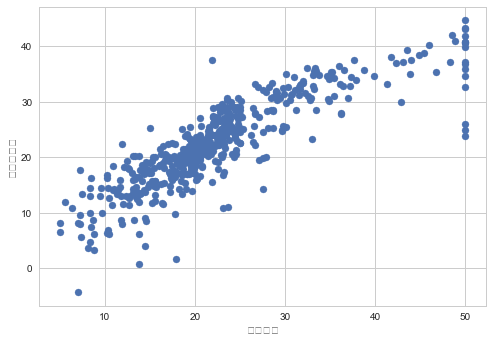

In [167]:
plt.scatter(dfy,dfy_new)
plt.xlabel('실제집값')
plt.ylabel('집값예측치')

In [174]:
## 매니저님이 보내주심 
from sklearn.datasets import load_boston

boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model = sm.OLS(dfy, dfX)
result = model.fit()
dfy_new = result.predict(dfX)
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(dfy) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]





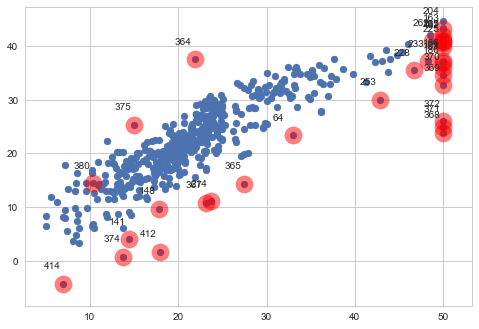

In [179]:
ax = plt.subplot()
plt.scatter(dfy, dfy_new)
plt.scatter(dfy.values[idx], dfy_new.values[idx], s=300, c="r", alpha=0.5)

from statsmodels.graphics import utils

utils.annotate_axes(range(len(idx)), idx, list(zip(dfy.values[idx].flatten(), dfy_new.values[idx].flatten())),
                    [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()


